<a href="https://colab.research.google.com/github/nachozobian/Food-Vision-Mini/blob/main/FoodVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoodVision project

This projects uses PyTorch computer vision to do Food Classification based on
images. This is a multiclass classification model. It'll be developed using device agnostic code.

In [2]:
import torch
from torch import nn

torch.__version__

'2.0.1+cu118'

In [4]:
#Setting up device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

**We're building a Food-Vision Mini and seeing if we're capable of developing a
model to differentiate food based on images of 101 different types.**

In [9]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If the image folder doesn't exist the following code will download it
if image_path.is_dir():
  print(f"{image_path} directory already exist... skip download")
else:
  print(f"{image_path} does not exist, create one")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data..")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exist... skip download
Unzipping pizza, steak and sushi data..


We'll now look a bit into the data. That's data preparation and data exploration phase

In [14]:
import os
def walk_through_dir(dir_path):
  "Walks through directory and return its contents"
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [15]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


In [13]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

**Visualizing one single image and metadata to attain some information in order to do the data preparation part**

Random image path: data/pizza_steak_sushi/test/pizza/195160.jpg
Image class: pizza
Image height: 384
Image width: 512


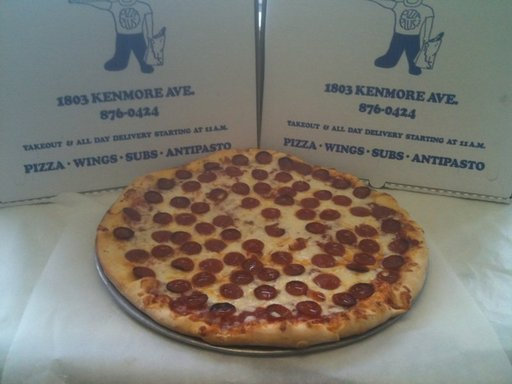

In [23]:
import random
from PIL import Image

random.seed(14)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)

#Get image class from path name
image_class = random_image_path.parent.stem

#Open image
img = Image.open(random_image_path)

#Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 383.5, -0.5)

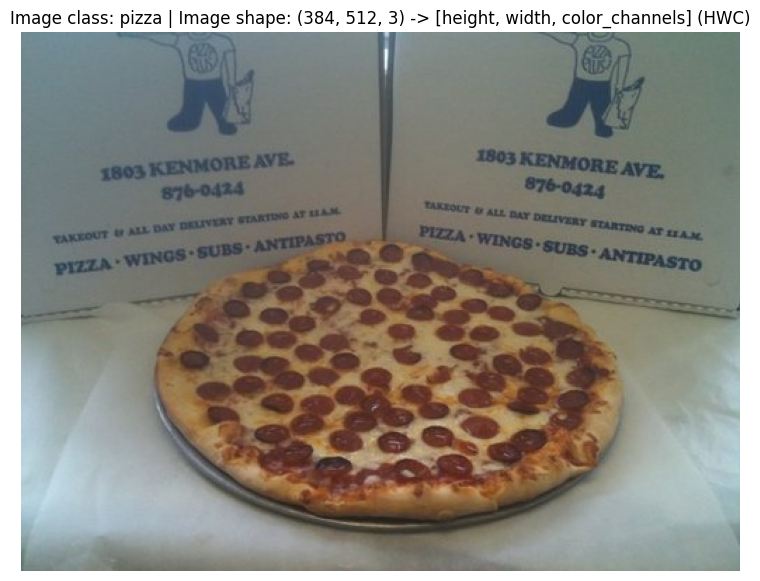

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#Image into array

img_as_array = np.asarray(img)
plt.figure(figsize = (10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False)